In [ ]:
!pip install pds4_tools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import glob
import pds4_tools
from skimage.filters import threshold_otsu
from tqdm import tqdm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
if not os.path.exists('/content/drive/MyDrive/PlanB/inference_images/lr'):
  os.makedirs('/content/drive/MyDrive/PlanB/inference_images/lr')
if not os.path.exists('/content/drive/MyDrive/PlanB/inference_images/sr'):
  os.makedirs('/content/drive/MyDrive/PlanB/inference_images/sr')

In [ ]:
crop_size = 128

In [ ]:
xml_path = '/content/drive/MyDrive/TMC_Files/Tmc_data/ch2_tmc_nca_20191228T0043573692_d_img_d18/data/calibrated/20191228/ch2_tmc_nca_20191228T0043573692_d_img_d18.xml'
structures = pds4_tools.read(xml_path)  
data = structures[0].data
print(data.shape)
data = np.array(data[:(data.shape[0] - data.shape[0]%crop_size), :(data.shape[1] - data.shape[1]%crop_size)])
print(data.shape)

Processing label: /content/drive/MyDrive/TMC_Files/Tmc_data/ch2_tmc_nca_20191228T0043573692_d_img_d18/data/calibrated/20191228/ch2_tmc_nca_20191228T0043573692_d_img_d18.xml
Now processing a Array_2D_Image structure: ARRAY_0
(180409, 4000)
(180352, 3968)


In [ ]:
num_rows = data.shape[0]//crop_size
num_cols = data.shape[1]//crop_size

line_img = None
full_img = None

for i in tqdm(range(num_rows)):
  for j in range(num_cols):

    img_crop = data[i*crop_size: (i+1)*crop_size, j*crop_size: (j+1)*crop_size]
    # img_sr = model(img_crop)
    img_sr = img_crop

    if line_img is not None:
      line_img = np.concatenate((line_img, img_sr), axis=1)
    else:
      line_img = img_sr
    del img_sr
  
  # print(line_img.shape)
  if full_img is not None:
    full_img = np.concatenate((full_img, line_img), axis=0)
  else:
    full_img = line_img
  line_img = None

100%|██████████| 1409/1409 [11:13<00:00,  2.09it/s]


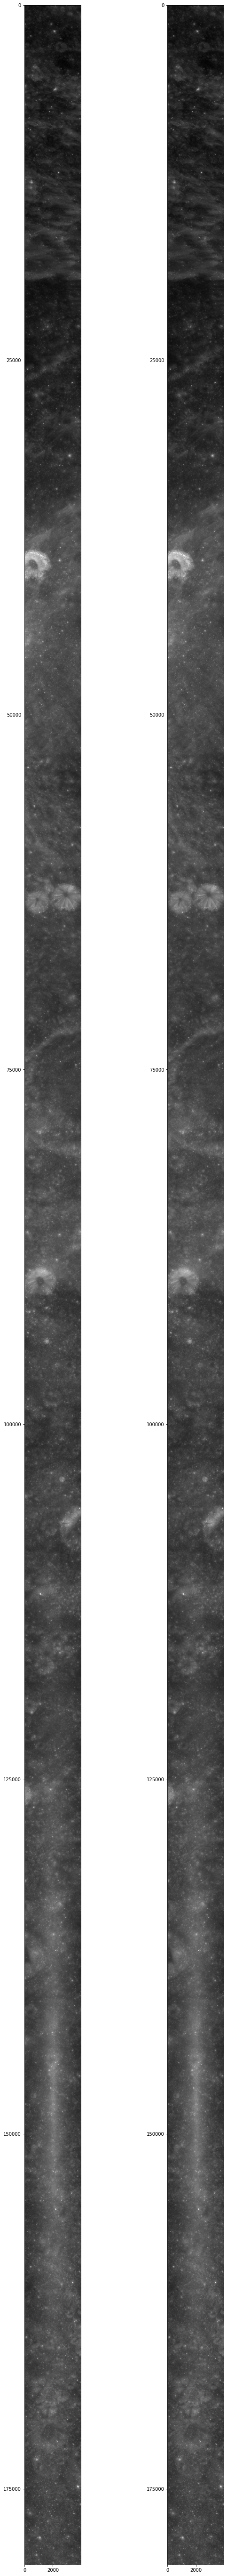

In [ ]:
plt.figure(figsize = (10,100))
plt.subplot(1, 2, 1)
plt.imshow(data, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(full_img, cmap='gray')